In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Kode ini menggunakan tiga library utama: cv2 untuk memproses gambar,numpy untuk melakukan perhitungan data, dan matplotlib untuk menampilkan gambar atau grafik. Dengan menggunakan ketiganya, kita dapat dengan mudah membaca gambar, memanipulasi data, dan langsung melihat hasilnya.

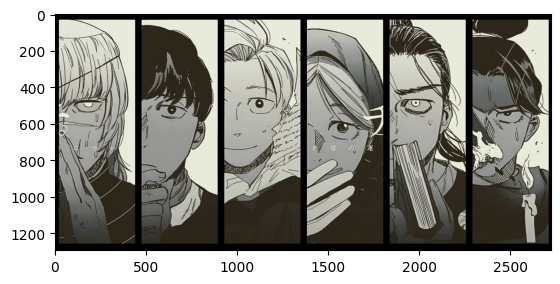

In [50]:
frame = plt.imread('aktivis.jpg')
plt.imshow(frame, cmap='gray')

Kode ini digunakan untuk membaca gambar dari file yang bernama 'aktivis.jpg' menggunakan plt.imread() dari library matplotlib, dan kemudian menampilkan gambar tersebut dalam bentuk grayscale dengan menggunakan plt.imshow(frame, cmap='gray'). cmap='gray' untuk mengetahui bahwa gambar yang ditampilkan menggunakan warna abu-abu.

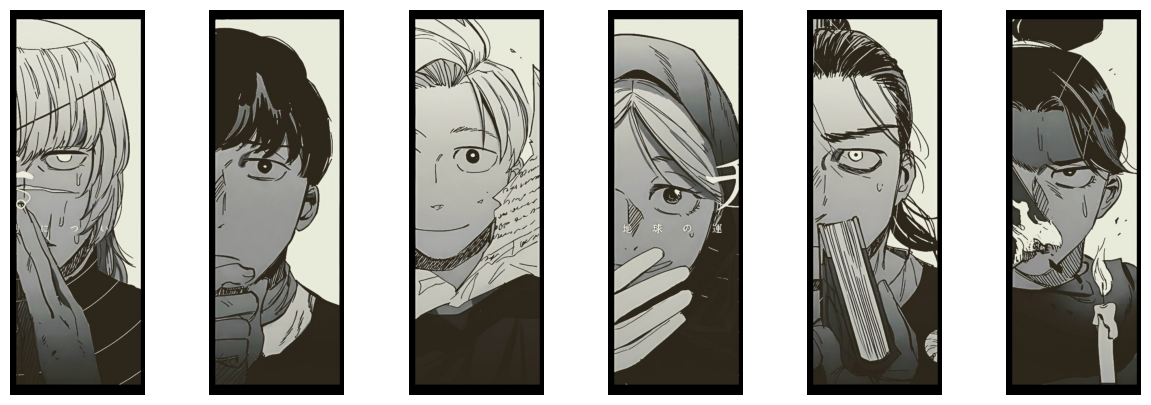

In [56]:
def pecah_frame(frame):
    if len(frame.shape) == 3:
        height, width, _ = frame.shape
    else:
        height, width = frame.shape

    bagian_width = width // 6

    bagian1 = frame[:, 0:bagian_width]
    bagian2 = frame[:, bagian_width:2*bagian_width]
    bagian3 = frame[:, 2*bagian_width:3*bagian_width]
    bagian4 = frame[:, 3*bagian_width:4*bagian_width]
    bagian5 = frame[:, 4*bagian_width:5*bagian_width]
    bagian6 = frame[:, 5*bagian_width:6*bagian_width]

    return bagian1, bagian2, bagian3, bagian4, bagian5, bagian6

bagian1, bagian2, bagian3, bagian4, bagian5, bagian6 = pecah_frame(frame)

plt.figure(figsize=(15,5))

plt.subplot(1,6,1)
plt.imshow(bagian1)
plt.axis('off')

plt.subplot(1,6,2)
plt.imshow(bagian2)
plt.axis('off')

plt.subplot(1,6,3)
plt.imshow(bagian3)
plt.axis('off')

plt.subplot(1,6,4)
plt.imshow(bagian4)
plt.axis('off')

plt.subplot(1,6,5)
plt.imshow(bagian5)
plt.axis('off')

plt.subplot(1,6,6)
plt.imshow(bagian6)
plt.axis('off')

plt.show()

Kode ini digunakan untuk membagi gambar menjadi 6 bagian secara horizontal memanjang dengan memeriksa dimensi gambar terlebih dahulu (apakah berwarna atau grayscale). Fungsi pecah_frame() membagi lebar gambar menjadi 6 bagian yang sama, dan kemudian setiap bagian ditampilkan dalam satu baris menggunakan plt.subplot(). lalu plt.show() menampilkan gambar-gambar tersebut secara bersamaan dalam satu frame.

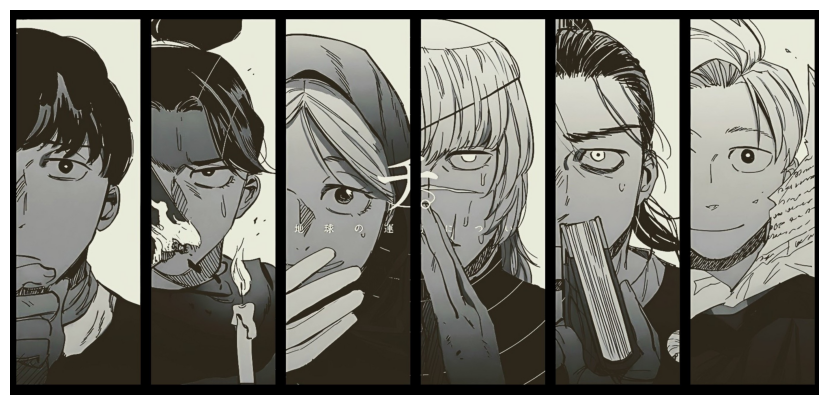

In [ ]:
urutan_baru = [bagian2, bagian6, bagian4, bagian1, bagian5, bagian3]

if len(urutan_baru[0].shape) == 2:
    tinggi, lebar = urutan_baru[0].shape
    lebar_total = lebar * 6
    gambar_gabungan = np.zeros((tinggi, lebar_total), dtype=urutan_baru[0].dtype)

    for idx, gambar in enumerate(urutan_baru):
        start = idx * lebar
        end = start + lebar
        gambar_gabungan[:, start:end] = gambar

plt.figure(figsize=(15,5))
plt.imshow(gambar_gabungan)
plt.axis('off')
plt.show()


Kode ini menyusun ulang urutan bagian-bagian gambar yang telah dibagi sebelumnya dengan menentukan urutan baru (urutan_baru). Kemudian, gambar-gambar tersebut digabungkan secara horizontal memanjang ke dalam satu gambar utuh dengan menghitung total lebar gabungan dan membuat array kosong yang sesuai. Setiap gambar dari urutan baru ditempatkan di posisi nya masing-masing di dalam array gabungan. Setelah itu, gambar hasil gabungan ditampilkan menggunakan plt.imshow() dan plt.axis('off').

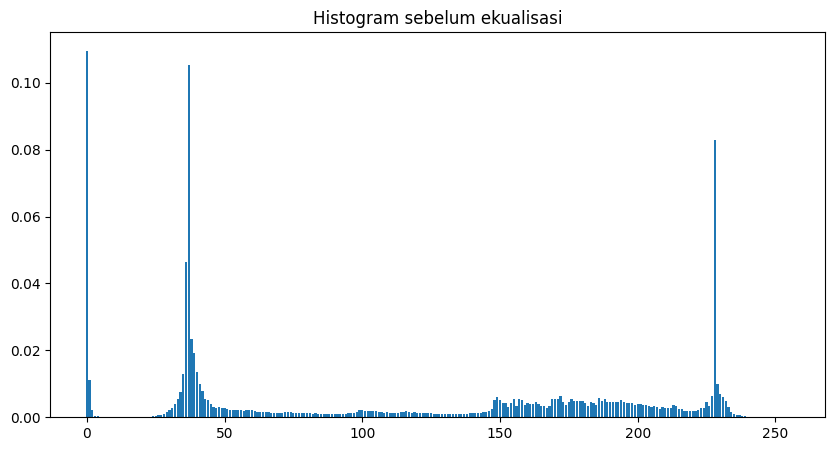

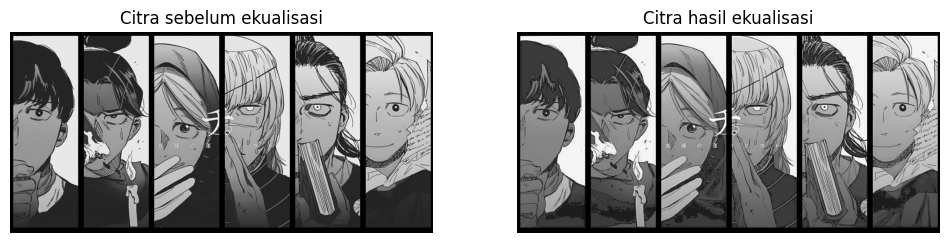

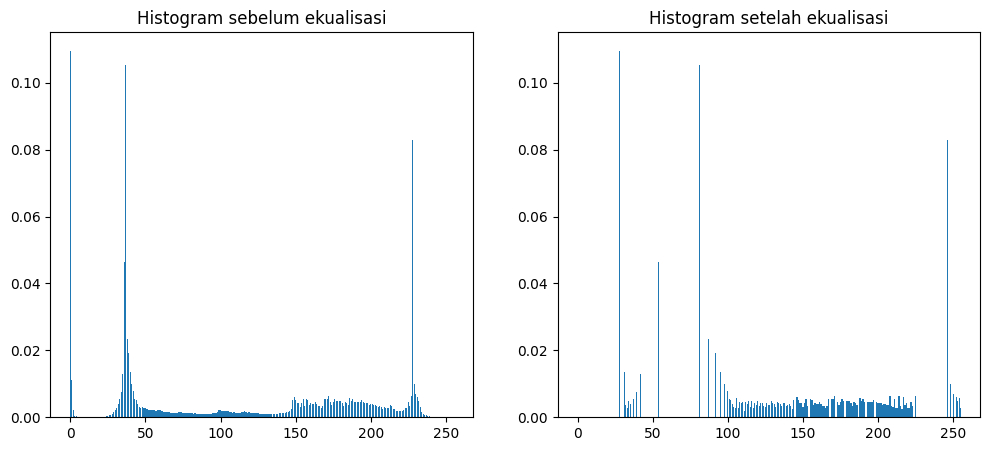

In [70]:
def buat_hist(citra):
    canvas = [i for i in range(256)]
    height, width = citra.shape

    canvas2 = np.zeros(256)
    for i in range(height):
        for j in range(width):
            val = citra[i, j]
            canvas2[val] += 1

    canvas2 = canvas2 / np.sum(canvas2)
    return canvas, canvas2


if len(gambar_gabungan.shape) == 3:
    gambar_gray = np.mean(gambar_gabungan, axis=2).astype(np.uint8) 
else:
    gambar_gray = gambar_gabungan

canvas, canvas2 = buat_hist(gambar_gray)

plt.figure(figsize=(10,5))
plt.bar(canvas, canvas2)
plt.title("Histogram sebelum ekualisasi")
plt.show()

e_hist = np.zeros(256, dtype=int)

height, width = gambar_gray.shape
for i in range(height):
    for j in range(width):
        val = gambar_gray[i,j]
        e_hist[val] += 1

cdf = np.zeros(256, dtype=int)
for i in range(256):
    cdf[i] = np.sum(e_hist[0:i+1])

hasil = np.round((cdf * 255) / (height * width)).astype(np.uint8)

hasil2 = np.zeros(gambar_gray.shape, dtype=np.uint8)
for i in range(height):
    for j in range(width):
        val = gambar_gray[i, j]
        hasil2[i, j] = hasil[val]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(gambar_gray, cmap='gray')
plt.title("Citra sebelum ekualisasi")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(hasil2, cmap='gray')
plt.title("Citra hasil ekualisasi")
plt.axis('off')
plt.show()

e_canvas, e_canvas2 = buat_hist(hasil2)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(canvas, canvas2)
plt.title("Histogram sebelum ekualisasi")

plt.subplot(1,2,2)
plt.bar(e_canvas, e_canvas2)
plt.title("Histogram setelah ekualisasi")
plt.show()

dalam kode ini, pertama-tama gambar yang telah digabungkan diubah menjadi grayscale dengan menghitung rata-rata nilai warna dari setiap piksel jika gambar tersebut berwarna. Fungsi buat_hist() digunakan untuk menghitung histogram dari gambar grayscale tersebut, yang menghitung frekuensi kemunculan setiap intensitas pixel. Histogram ini kemudian ditampilkan menggunakan plt.bar(). Selanjutnya, dilakukan proses ekualisasi histogram dengan menghitung CDF (Cumulative Distribution Function) dari histogram, yang kemudian digunakan untuk mengubah intensitas pixel pada gambar.

Setelah proses ekualisasi selesai, gambar yang telah di proses ekualisasi ditampilkan dengan gambar asli menggunakan plt.subplot(). Histogram sebelum dan sesudah ekualisasi juga ditampilkan untuk menunjukkan perbedaan distribusi intensitas pixel. Histogram sebelum ekualisasi menunjukkan distribusi yang lebih terpusat di tengah2, sementara setelah ekualisasi, histogram menjadi lebih merata, menunjukkan bahwa ekualisasi sudah mendistribusikan nilai intensitas secara lebih merata.